In [1]:
import csv
import numpy as np
def load_cohp(file):
    with open(file, newline='') as f:
        def condenser(x):
            rv = x
            while '  ' in rv:
                rv = rv.replace('  ', ' ')
            rv = rv.strip()
            return rv
        rdr = csv.reader(map(condenser,f), delimiter=' ')
        line = 0
        cohps = []
        energy = []
        cohpsvals = []
        ncohps = 0
        for r in rdr:
            line += 1
            if line == 2:
                ncohps = int(r[0])
            if line >= 3 and line < 3+ncohps:
                # cohp label
                cohps.append(r[0])
            if line >= 3+ncohps:
                # data
                assert len(r) == 2*ncohps+1, "Malformed line in input file"
                energy.append(float(r[0]))
                cohpsvals.append([float(i) for i in r[1:]])
    cohpsvals = np.array(cohpsvals)
    rv = {}
    for i in range(0,ncohps):
        rv[cohps[i]] = {'pCOHP': np.stack((energy,cohpsvals[:,2*i])).T, 'ipCOHP': np.stack((energy,cohpsvals[:,2*i+1])).T}
    return rv

In [2]:
cohp = load_cohp('COHPCAR.lobster')

<IPython.core.display.Javascript object>


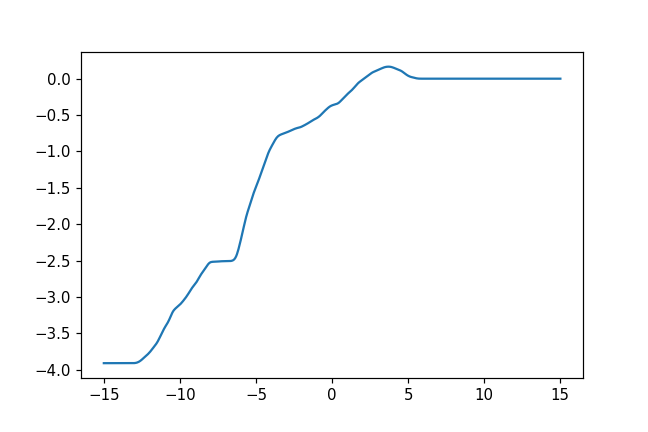

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(cohp['Average']['ipCOHP'][:,0],cohp['Average']['ipCOHP'][:,1])

<IPython.core.display.Javascript object>


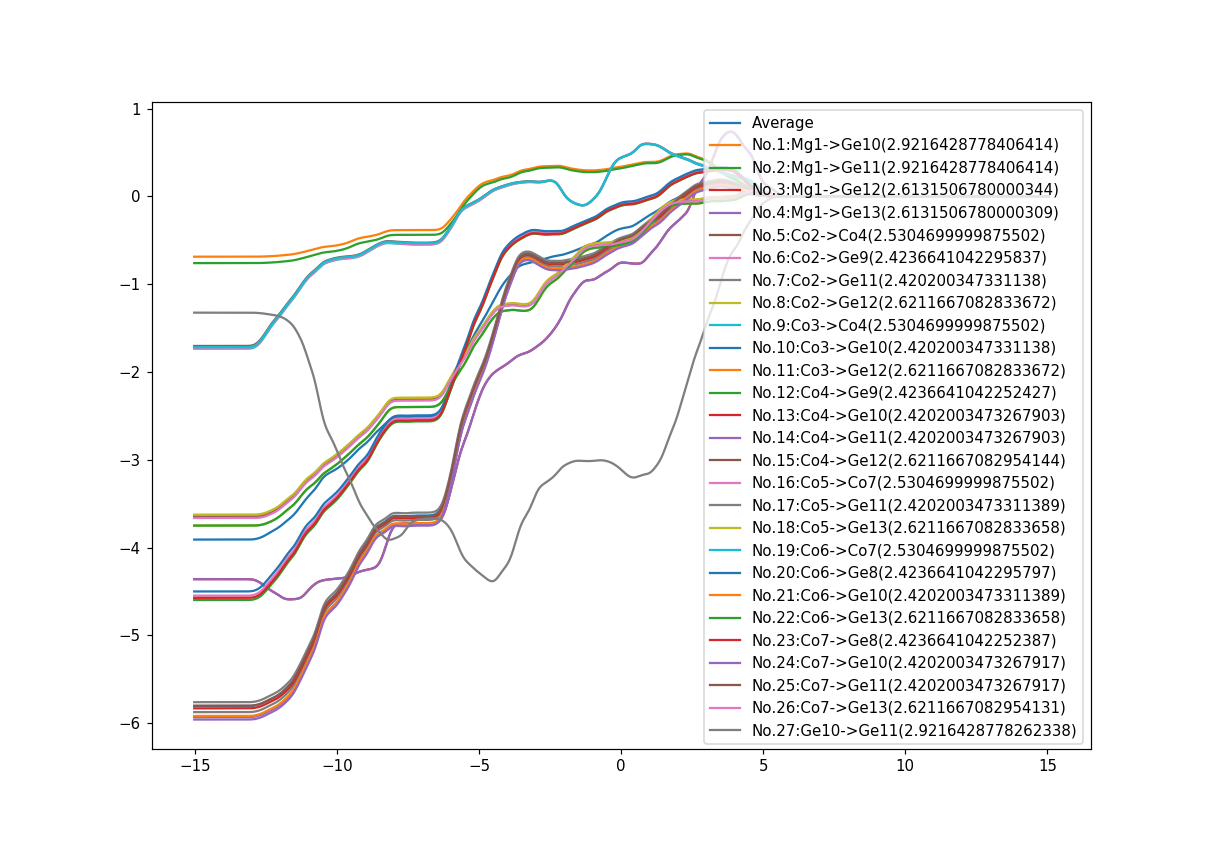

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
for k in cohp:
#    plt.plot(cohp[k]['pCOHP'][:,0],cohp[k]['pCOHP'][:,1],label=k)
    plt.plot(cohp[k]['ipCOHP'][:,0],cohp[k]['ipCOHP'][:,1], label=k)
plt.legend()